#                                      Projekt zaliczeniowy - Grzegorz Maślanka


In [1]:
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage import measure
from scipy import ndimage as ndi
import skimage.io
import numpy as np
from skimage import segmentation
import cv2
from skimage import io, color, img_as_ubyte, util
from skimage import data, io, filters
from scipy import ndimage
from scipy.spatial import distance
import math
from skimage import morphology
from skimage.morphology import binary_erosion, opening
from skimage.color import rgb2gray
from skimage import exposure, filters


Funkcja wyswietlajaca obrazki

In [2]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    import matplotlib.pyplot as plt
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

Próg binaryzacji:  172


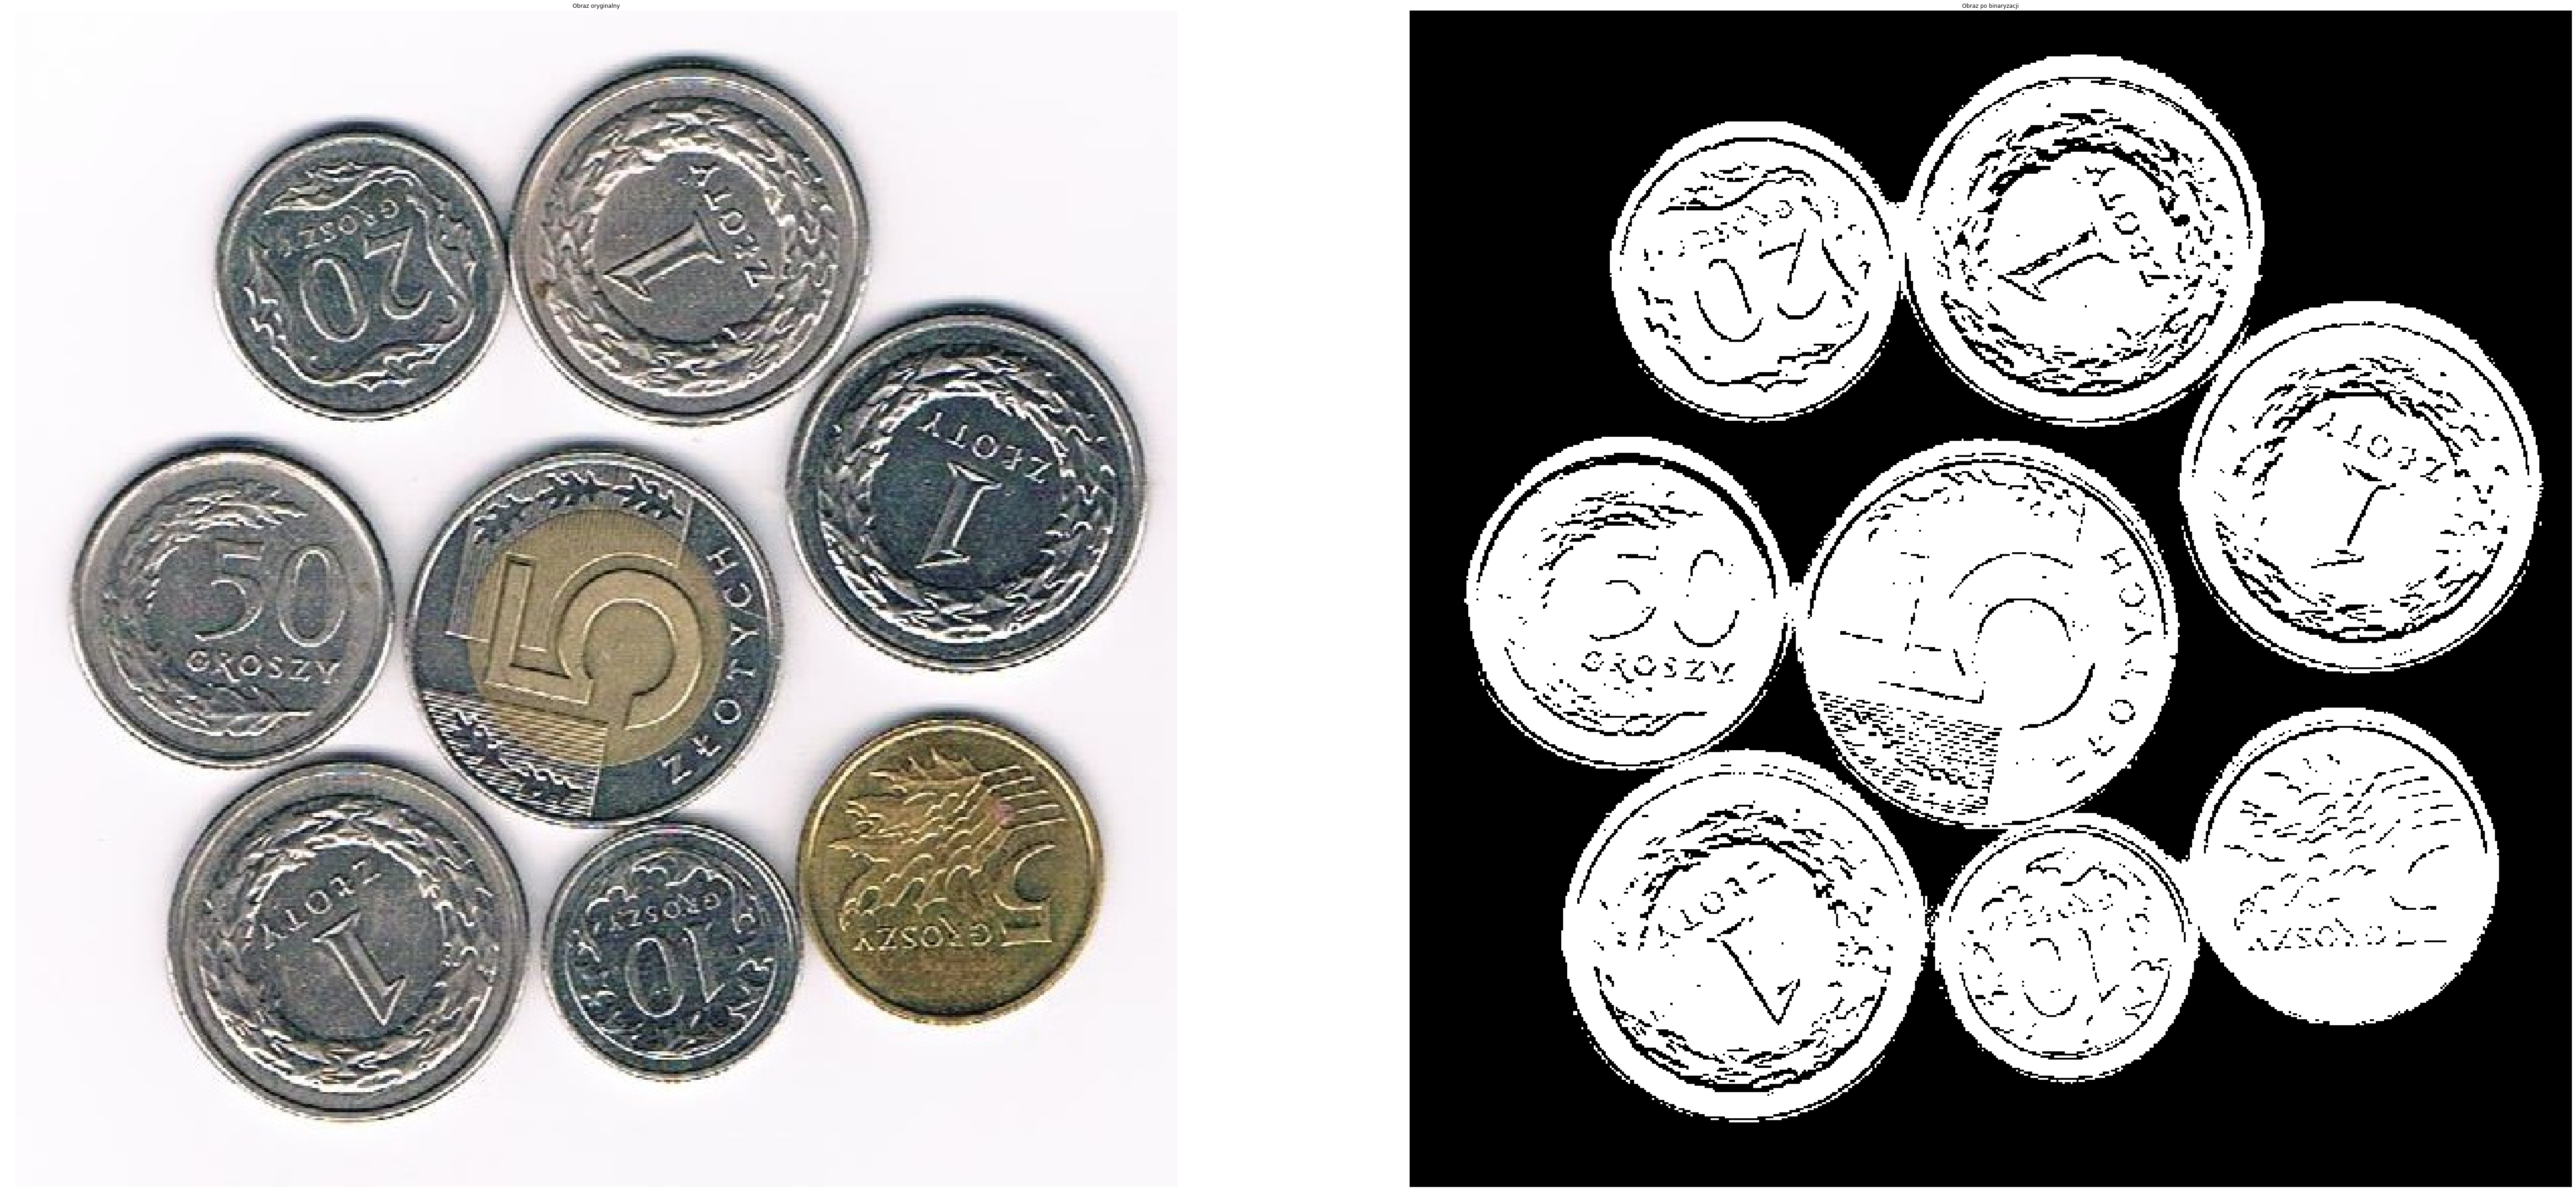

In [3]:

zdj = '015.jpg' ## przesyłanie wybrane zdjecia


images = io.imread(zdj)
image = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY) ## z rgb na gray






#binaryzacja 1
th = filters.threshold_otsu(image)

binary = image < th
print("Próg binaryzacji: ", th)



show2imgs(images, binary, title1='Obraz oryginalny', title2='Obraz po binaryzacji', size=(100,100))


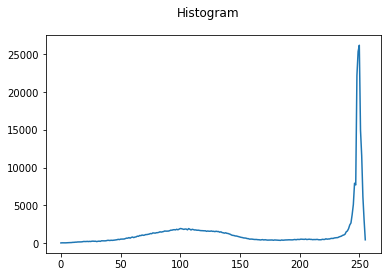

In [4]:
bins=np.arange(0, 257)
histo = np.histogram(image, bins=bins)

hist, bins = histo

plt.plot(bins[:-1], hist)
plt.suptitle('Histogram')
plt.show()


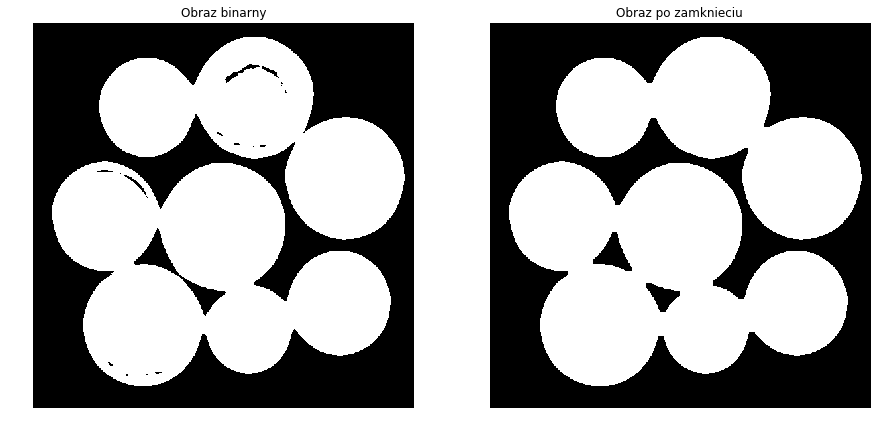

In [5]:


##binaryzacja #2
mean = cv2.blur(image, (10,10))
th, bin_img = cv2.threshold(mean, th, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((3,3),np.uint8)

# d = cv2.dilate(bin_img,kernel,iterations = 10)
# e = cv2.erode(d,kernel,iterations = 10)




# erodeBin = cv2.erode(bin_img, kernel=kernel, iterations=2)
closingBin = cv2.morphologyEx(bin_img, op=cv2.MORPH_CLOSE, kernel=kernel, iterations=3) ## operacja zamknciecia
show2imgs(bin_img, closingBin, title1='Obraz binarny', title2='Obraz po zamknieciu', size=(15,15))





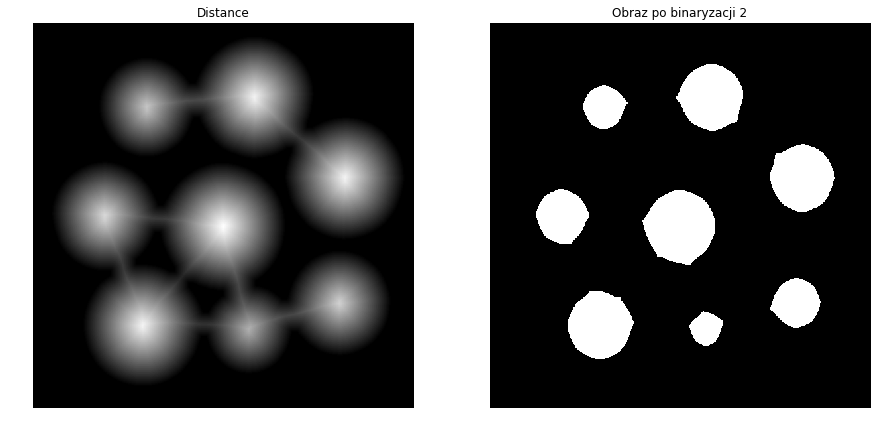

In [6]:

dist_transform = cv2.distanceTransform(closingBin,cv2.DIST_L2,5) ## operacja transformanty dystanswoej
ret, sure_fg = cv2.threshold(dist_transform,0.45*dist_transform.max(),255,0)


show2imgs(dist_transform, sure_fg, title1='Distance', title2='Obraz po binaryzacji 2', size=(15,15))


Znaleziono: 8 obiektów w podanym obrazie.


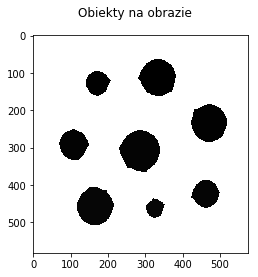

In [7]:


def getImage(url):  ##pobieranie obrazu
    im = io.imread(url)
    im = color.rgb2gray(im)
    im = img_as_ubyte(im) 
    im = util.invert(im)
    return im

import warnings
warnings.filterwarnings('ignore')

im = sure_fg

from skimage import exposure, filters
th = filters.threshold_otsu(im)
th, bim = cv2.threshold(im, thresh=th, maxval=255, type=cv2.THRESH_BINARY_INV)


def Search(i,j,zdj,color): ## indeksacja
    
    tab = [(i,j)]
    while tab:
        ii,jj = tab.pop(0)
        for x in range(-1,2):
            for y in range(-1,2):
                if x == 0 and y == 0:
                    continue
                a = ii + x
                b = jj + y
                check = a >= 0 and a < zdj.shape[0] and b >=0 and b < zdj.shape[1]
                if check and zdj[a][b] == 0:
                    zdj[a][b] = color
                    tab.append((a,b))
                    
def LfObjects(zdj,start = 4,krok = 1): ## zliczanie obiektow
    a = start
    b = 0
    for i in range(zdj.shape[0]):
        for j in range(zdj.shape[1]):
            value = zdj[i][j]
            if value == 0:
                b += 1 ## zliczanie obiektow
                zdj[i][j] = a
                Search(i,j,zdj,a) ## wywolanie funkcji powyżej
                a += krok
    return b,zdj

image1,image2 = LfObjects(bim)
print('Znaleziono:',image1,'obiektów w podanym obrazie.')

plt.imshow(image2, cmap="gray")

plt.axis('on')
plt.suptitle('Obiekty na obrazie')
plt.show()




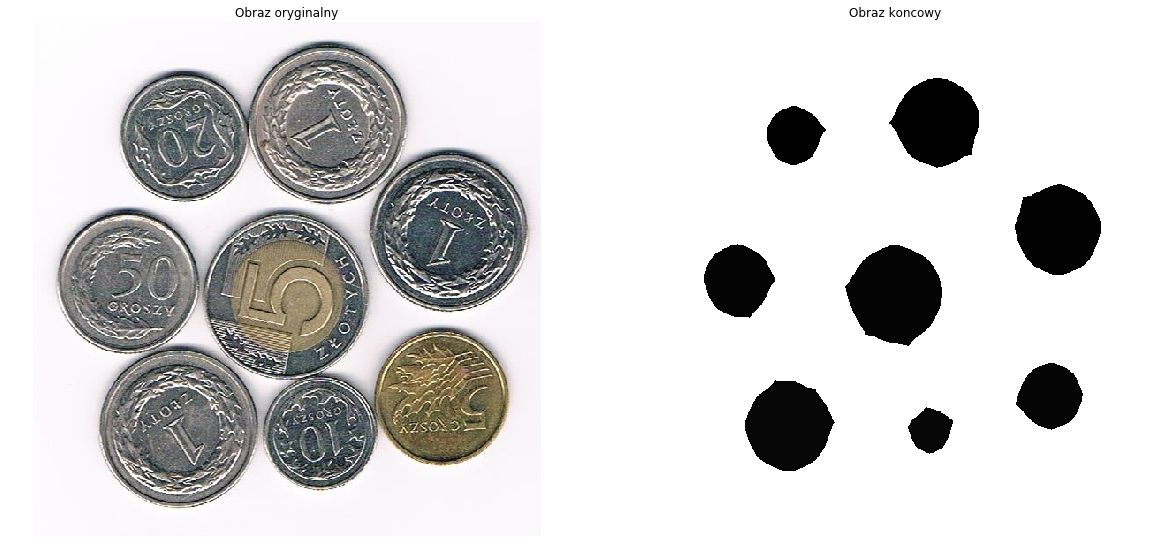

In [8]:
show2imgs(images, image2, title1='Obraz oryginalny', title2='Obraz koncowy', size=(20,20))

In [9]:
s=4
Pp=[0] * 256

for i in range(image2.shape[0]):
    for j in range(image2.shape[1]):
        for s in range(30):
            if image2[i,j]==s:
                Pp[s]+=1
                
                
j = 1                             
i = 4
print("Pola powierzchni monet (od pierwszej napotkanej): ")
while(i<=255):
    print("[",j,"] :",Pp[i])
    i+=1
    j+=1

Pola powierzchni monet (od pierwszej napotkanej): 
[ 1 ] : 7470
[ 2 ] : 3159
[ 3 ] : 7523
[ 4 ] : 4811
[ 5 ] : 9077
[ 6 ] : 4088
[ 7 ] : 7606
[ 8 ] : 1822
[ 9 ] : 0
[ 10 ] : 0
[ 11 ] : 0
[ 12 ] : 0
[ 13 ] : 0
[ 14 ] : 0
[ 15 ] : 0
[ 16 ] : 0
[ 17 ] : 0
[ 18 ] : 0
[ 19 ] : 0
[ 20 ] : 0
[ 21 ] : 0
[ 22 ] : 0
[ 23 ] : 0
[ 24 ] : 0
[ 25 ] : 0
[ 26 ] : 0
[ 27 ] : 0
[ 28 ] : 0
[ 29 ] : 0
[ 30 ] : 0
[ 31 ] : 0
[ 32 ] : 0
[ 33 ] : 0
[ 34 ] : 0
[ 35 ] : 0
[ 36 ] : 0
[ 37 ] : 0
[ 38 ] : 0
[ 39 ] : 0
[ 40 ] : 0
[ 41 ] : 0
[ 42 ] : 0
[ 43 ] : 0
[ 44 ] : 0
[ 45 ] : 0
[ 46 ] : 0
[ 47 ] : 0
[ 48 ] : 0
[ 49 ] : 0
[ 50 ] : 0
[ 51 ] : 0
[ 52 ] : 0
[ 53 ] : 0
[ 54 ] : 0
[ 55 ] : 0
[ 56 ] : 0
[ 57 ] : 0
[ 58 ] : 0
[ 59 ] : 0
[ 60 ] : 0
[ 61 ] : 0
[ 62 ] : 0
[ 63 ] : 0
[ 64 ] : 0
[ 65 ] : 0
[ 66 ] : 0
[ 67 ] : 0
[ 68 ] : 0
[ 69 ] : 0
[ 70 ] : 0
[ 71 ] : 0
[ 72 ] : 0
[ 73 ] : 0
[ 74 ] : 0
[ 75 ] : 0
[ 76 ] : 0
[ 77 ] : 0
[ 78 ] : 0
[ 79 ] : 0
[ 80 ] : 0
[ 81 ] : 0
[ 82 ] : 0
[ 83 ] : 0
[ 84 ] : 0
[ 85 ] : 0

 Zliczanie nominałów

In [10]:
suma = 0.0
r = image1 ## liczba obiektow

for i in range(4,4 + r):
    if Pp[i] >= 8484 and Pp[i] <= 9373: ## 5 zlotych
        suma += 5
    if Pp[i] >= 6231 and Pp[i] <= 6537: ## 2 zlote
        suma += 2
    if Pp[i] >= 6951 and Pp[i] <= 7903: ## 1 zloty
        suma += 1
    if Pp[i] >= 4664 and Pp[i] <= 4998: ## 50 groszy
        suma += 0.5
    if Pp[i] >= 3717 and Pp[i] <= 4149: ## 5 groszy
        suma += 0.05
    if Pp[i] >= 3041 and Pp[i] <= 3278: ## 20 groszy
        suma += 0.2
    if Pp[i] >= 2487 and Pp[i] <= 2622: ## 2 grosze
        suma += 0.02
    if Pp[i] >= 1640 and Pp[i] <= 1867: ## 10 groszy
        suma += 0.1
    
        
        
print("Na zdjeciu sa nominały o wartosci: ", round(suma,2) , " zł.")

Na zdjeciu sa nominały o wartosci:  8.85  zł.


Liczenie jaki procent obrazu stanowia obiekty

In [11]:
SumaObiektow = 0
IlePikseli = 0
for i in range(4,4 + r):
    SumaObiektow += Pp[i]



for i in range(image2.shape[0]):
        for j in range(image2.shape[1]):
            IlePikseli +=1
          
print("Caly obraz ma", IlePikseli ," pikseli, a suma obiektow na tym obrazie to ", SumaObiektow, " pikseli, wiec obiekty stanowia około ", round((SumaObiektow * 100)  / IlePikseli  , 2) , " % calego obrazu.")


Caly obraz ma 334650  pikseli, a suma obiektow na tym obrazie to  45556  pikseli, wiec obiekty stanowia około  13.61  % calego obrazu.


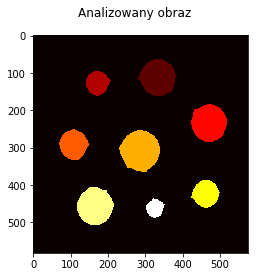

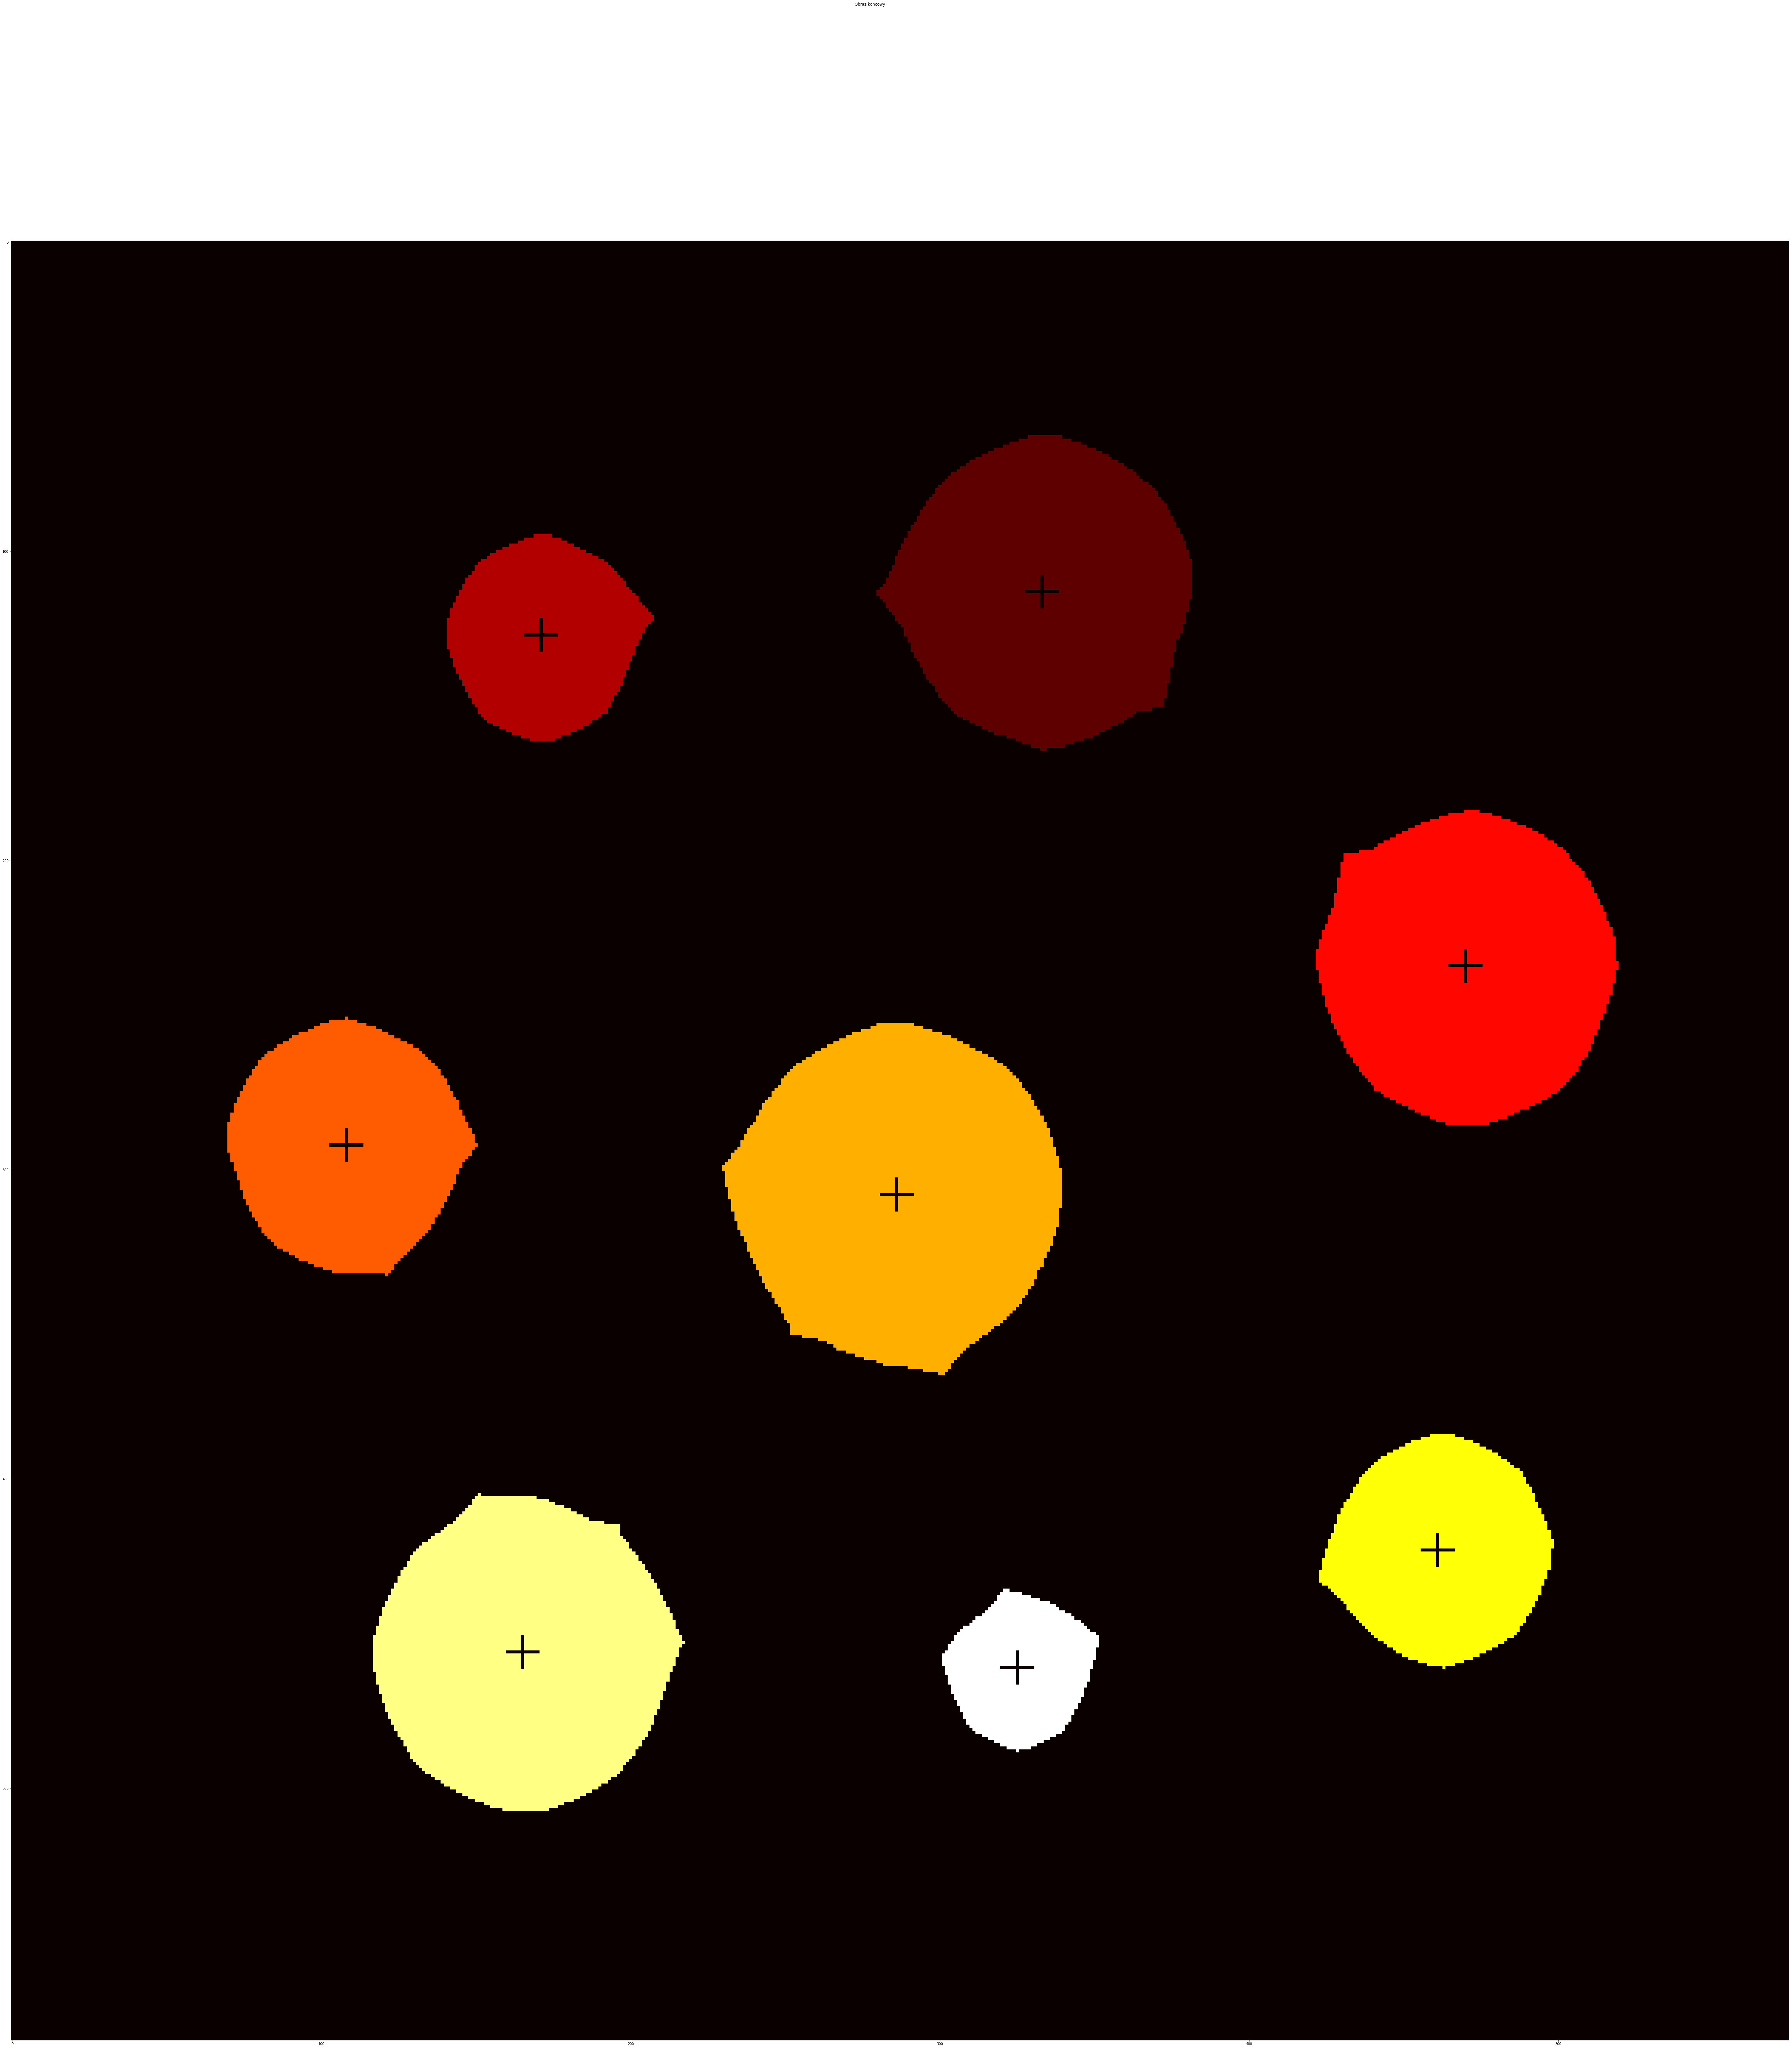

Szczegolowy opis obiektow: 
Liczba punktow:  2925  Srodek ciezkosci:  [208.1931623931624, 179.69606837606838]  Blair-Bliss:  0.08505419327942193  Feret:  1.0072332730560578 Haralick:  0.9998928337164741
Liczba punktow:  6024  Srodek ciezkosci:  [118.54980079681275, 96.43642098273573]  Blair-Bliss:  0.1551146902166362  Feret:  1.0053956834532374 Haralick:  0.9999837518707592
Liczba punktow:  11281  Srodek ciezkosci:  [138.96888573708006, 96.64595337292793]  Blair-Bliss:  0.23144758643434032  Feret:  1.0449640287769784 Haralick:  0.9999803416685591
Liczba punktow:  14227  Srodek ciezkosci:  [257.2426372390525, 105.7576439164968]  Blair-Bliss:  0.20285135738106835  Feret:  1.0338078291814947 Haralick:  0.9999727848125837
Liczba punktow:  22851  Srodek ciezkosci:  [212.1883943809899, 237.02940790337402]  Blair-Bliss:  0.20831523312108874  Feret:  1.0121951219512195 Haralick:  0.9998880199012831
Liczba punktow:  23299  Srodek ciezkosci:  [371.0131765311816, 304.56744924674877]  Blair-Bliss:

In [12]:

labels = measure.label(sure_fg)
tdd = 40 # Filtruje obraz w poszukiwaniu progu binaryzacji.

photo = getImage('015.jpg')
binaryzacja = sure_fg > tdd #Binaryzacja

label_objects, nb_labels = ndi.label(binaryzacja)
plt.imshow(label_objects, cmap='hot')
plt.axis('on')
plt.suptitle('Analizowany obraz')
plt.show()


def getFigure(labelledImage, objNumber): ## pobiera obiekt
    
    points = []
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                points.append((y,x))

    return points

label_objects2, nb_labels2 = ndi.label(binaryzacja)
points = [getFigure(label_objects2, i+1) for i in range(nb_labels2)]





# RYSOWANIE SRODKU CIEZKOSCI NA OBIEKTACH

def cog(labelledImage, objNumber):
    cx = 0
    cy = 0
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                cy = cy + y
                cx = cx + x

    cx = cx / sizes[objNumber]
    cy = cy / sizes[objNumber]

    return int(cy), int(cx)

# Tworzymy maske
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0

figures = mask_sizes[label_objects]

cogs = []
for i in range(nb_labels):
    cogs.append(cog(label_objects, i+1))

def drawMarkers(im, coords): ## rysowanie środka ciężkosci obiektu

    im = np.copy(im)
    
    for item in coords:
        y,x = item
        for j in range(y-5, y+6):
            im[j,x] = 0
        for i in range(x-5, x+6):
            im[y,i] = 0
            
    return im

# Wypisujemy na ekran
lo = drawMarkers(label_objects, cogs)
plt.figure(figsize=(100,100))
plt.imshow(lo, cmap='hot')
plt.axis('on')
plt.suptitle('Obraz koncowy')
plt.show()

# Wyznaczamy srodek ciezkosci
def cog2(points):
    mx=0
    my=0
    for (y,x) in points:
        mx = mx + x
        my = my + y
    mx = mx/len(points)
    my = my/len(points)
    
    return [my, mx]

    


# Wspolczynnik Blaira-Blissa
def computeBB(points):
    
    s = len(points)
    my,mx = cog2(pts)
    
    r = 0
    for point in points:
         r = r + distance.euclidean(point,(my,mx))**2
            
    return s/(math.sqrt(2*math.pi*r))

# Wspolczynnik Fereta
def computeFeret(points):
    
    px = [x for (y,x) in points]
    py = [y for (y,x) in points]
    
    fx = max(px) - min(px)
    fy = max(py) - min(py)
    
    return float(fy)/float(fx) 


def Haralick(centroid, contours):
    n = len(contours)
    mx, my = centroid
    d1 = 0
    d2 = 0
    for i in range(n):
        d1 += distance.euclidean((contours[i][0][1], contours[i][0][0]),(my,mx))
        d2 += (distance.euclidean((contours[i][0][1], contours[i][0][0]),(my,mx))**2 - 1)
    return math.sqrt((d1**2)/(n*d2))




print("Szczegolowy opis obiektow: ")
obj = labels.max()
for i in range(obj):
    pts = getFigure(photo, i+1)
    centroid = cog2(pts)
    harlick = Haralick(centroid,images)
    bb = computeBB(pts)
    feret = computeFeret(pts)

    
    print('Liczba punktow: ',len(pts),' Srodek ciezkosci: ', cog2(pts),' Blair-Bliss: ', bb,' Feret: ',feret, "Haralick: ", harlick)